# Portfolio for SDSPhD20

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".

---

## SOLVED Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

1 Inspect Data

In [ ]:
#inspect data
penguins.info()
penguins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


species_short     island  ...  body_mass_g     sex
0        Adelie  Torgersen  ...       3750.0    MALE
1        Adelie  Torgersen  ...       3800.0  FEMALE
2        Adelie  Torgersen  ...       3250.0  FEMALE
3        Adelie  Torgersen  ...          NaN     NaN
4        Adelie  Torgersen  ...       3450.0  FEMALE

[5 rows x 7 columns]

In [ ]:
print(penguins["species_short"].unique())
print(penguins["island"].unique())


['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


In [ ]:
penguins_clean = penguins.dropna(how = "any")
penguins_clean.info()
penguins_clean.reset_index(inplace=True, drop = True)
penguins_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


species_short     island  ...  body_mass_g     sex
0        Adelie  Torgersen  ...     3750.000    MALE
1        Adelie  Torgersen  ...     3800.000  FEMALE
2        Adelie  Torgersen  ...     3250.000  FEMALE
3        Adelie  Torgersen  ...     3450.000  FEMALE
4        Adelie  Torgersen  ...     3650.000    MALE

[5 rows x 7 columns]

2 Visual EDA

Text(0, 0.5, 'culmen length')

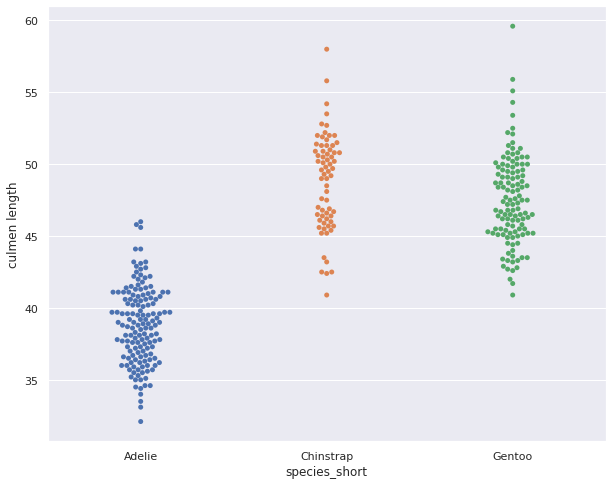

In [ ]:
sns.swarmplot(x = "species_short", y = "culmen_length_mm", data = penguins_clean)
plt.ylabel("culmen length")

Text(0, 0.5, 'flipper length')

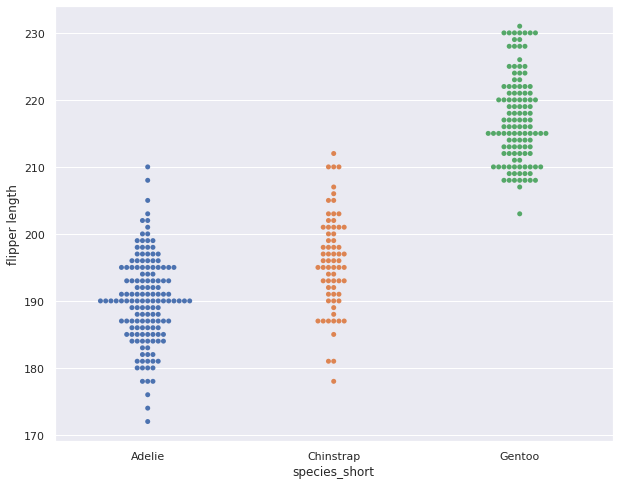

In [ ]:
sns.swarmplot(x= "species_short", y = "flipper_length_mm", data = penguins_clean)
plt.ylabel("flipper length")

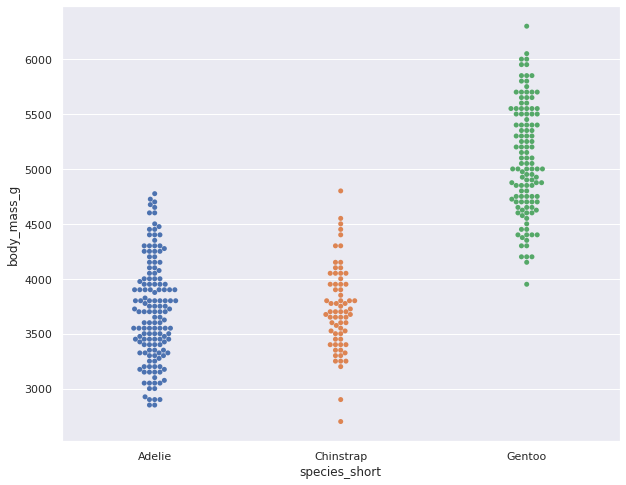

In [ ]:
sns.swarmplot(x= "species_short", y = "body_mass_g", data = penguins_clean)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


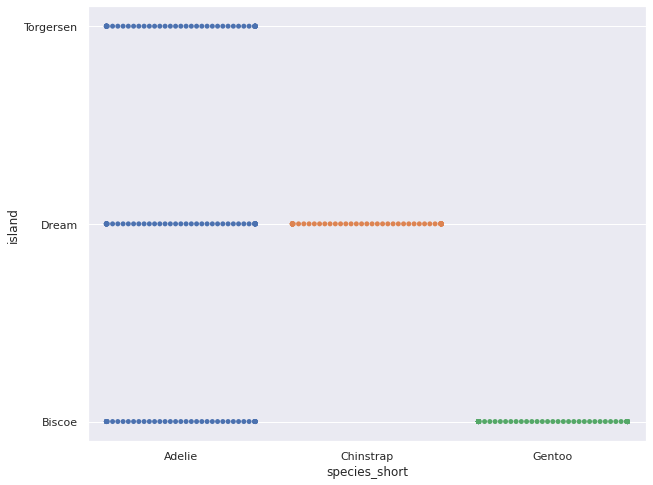

In [ ]:
sns.swarmplot(x= "species_short", y = "island", data = penguins_clean)


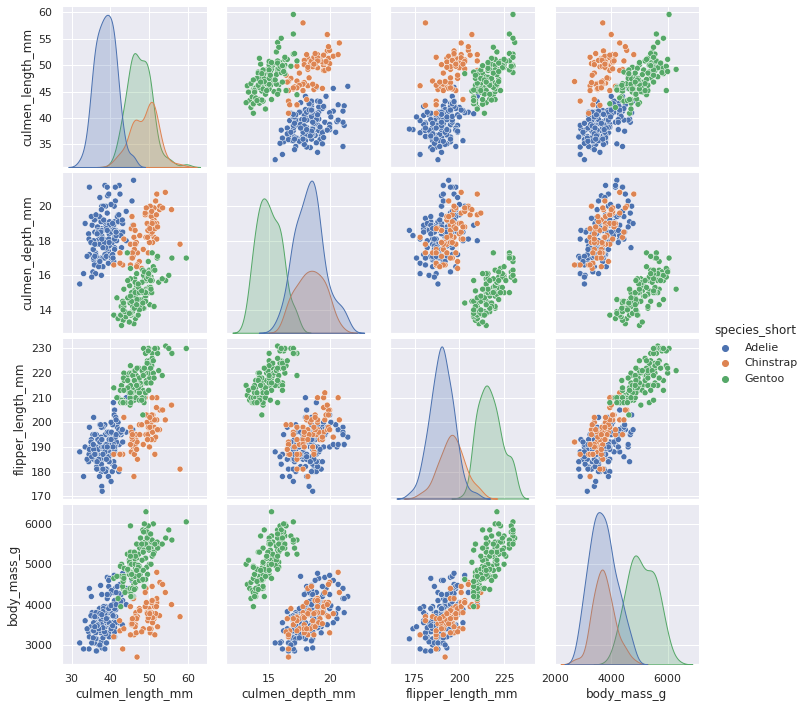

In [ ]:
sns.pairplot(penguins_clean, hue='species_short')

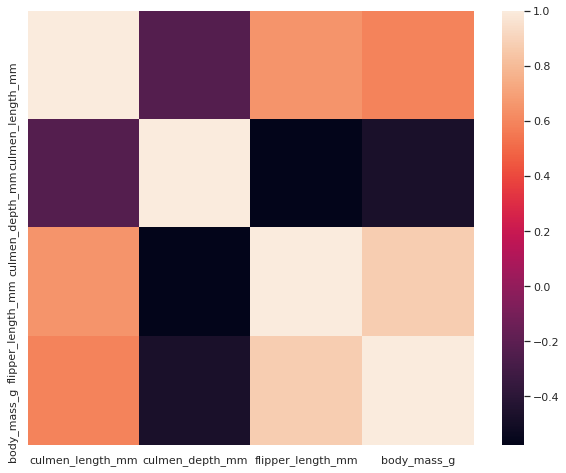

In [ ]:
sns.heatmap(penguins_clean.corr())

Adelie has smaller culmen length than the other two species
Gentoo has larger flipper length than the other two species
Gentoo are also heavier than the other two species
Adelie are the only penguins living on the three islands, chinstrap only on Dream and Gentoo only on Biscoe

Flipper length and body mass  positevly correlated length features > bigger animal, need for stronger flippers and larger beak to eat more

3 Data preprocessing / standard scaling

In [ ]:
penguins_numerical = penguins_clean[["culmen_length_mm","culmen_depth_mm","body_mass_g","flipper_length_mm"]]
penguins_numerical.head()

culmen_length_mm  culmen_depth_mm  body_mass_g  flipper_length_mm
0            39.100           18.700     3750.000            181.000
1            39.500           17.400     3800.000            186.000
2            40.300           18.000     3250.000            195.000
3            36.700           19.300     3450.000            193.000
4            39.300           20.600     3650.000            190.000

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
data_scaled = scaler.fit_transform(penguins_numerical)

pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
pd.DataFrame(data_scaled, columns = penguins_numerical.columns).describe()

culmen_length_mm  culmen_depth_mm  body_mass_g  flipper_length_mm
count           334.000          334.000      334.000            334.000
mean              0.000           -0.000       -0.000              0.000
std               1.002            1.002        1.002              1.002
min              -2.182           -2.066       -1.878             -2.072
25%              -0.824           -0.794       -0.820             -0.787
50%               0.093            0.071       -0.198             -0.287
75%               0.840            0.783        0.728              0.856
max               2.862            2.208        2.602              2.142

4 Run PCA

In [ ]:
from sklearn.decomposition import PCA

model = PCA()
model.fit(data_scaled)
data_reduced = model.transform(data_scaled)


5 Explore PCA results

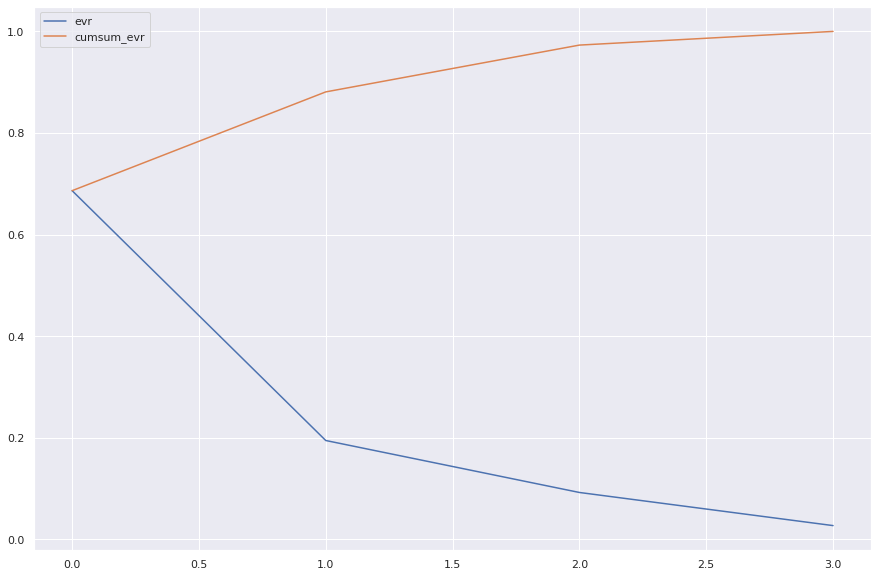

In [ ]:
import numpy as np
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

1st PC explains 85% of variability, the second explains the next 10%. Our model can be reduced to 2 components.


6 Plot first and second PCA

In [ ]:
#get vector
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

In [ ]:
#get reduced data
data_reduced = data_reduced[:,0:2]
np.shape(data_reduced)

(334, 2)

In [ ]:
PCA_df = pd.DataFrame(data = data_reduced, columns = ["first", "second"])
PCA_df["species"] = penguins_clean["species_short"]
PCA_df["island"] = penguins_clean["island"]

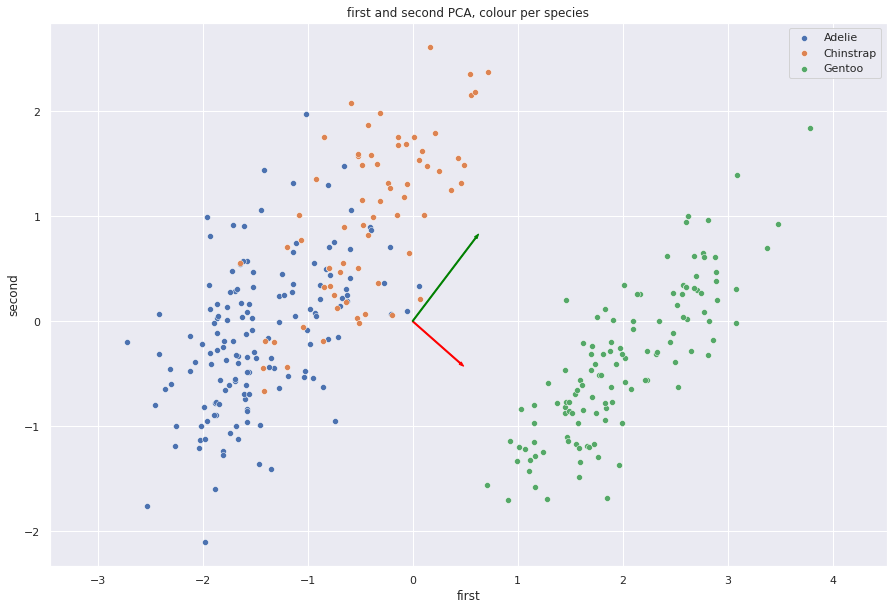

In [ ]:
PCA_df_species = PCA_df.groupby("species")
mean = model.mean_
# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)

names = []
for name, group in PCA_df_species:
    names.append(name)
    sns.scatterplot(x = "first", y="second", data = group, legend=True)
plt.axis('equal')
plt.legend(labels = names )
plt.title("first and second PCA, colour per species")
plt.show()

Text(0.5, 1.0, 'first and second PCA, colour per island')

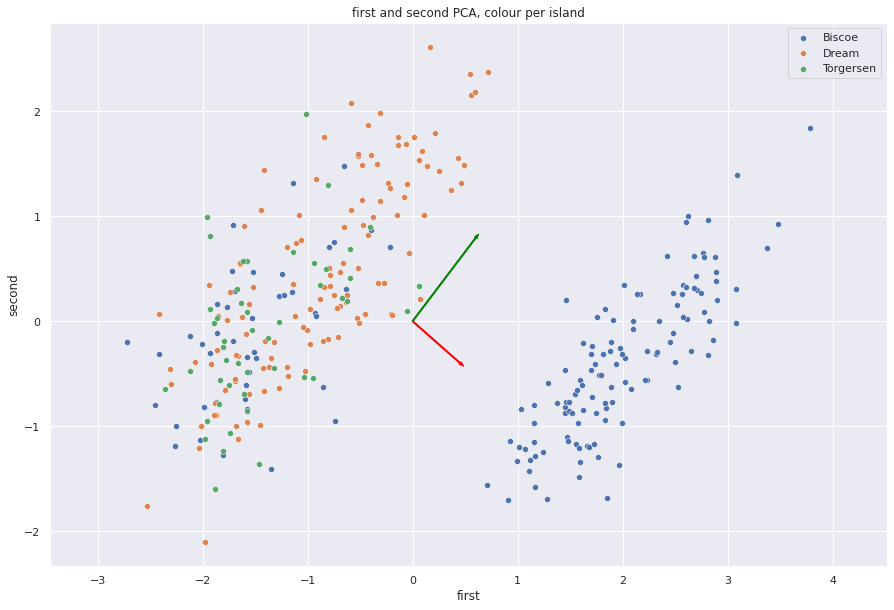

In [ ]:
PCA_df_islands = PCA_df.groupby("island")
mean = model.mean_
# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)

names=[]
for name, group in PCA_df_islands:
    names.append(name)
    sns.scatterplot(x = "first", y="second", data = group)
plt.axis('equal')
plt.legend(labels = names)
plt.title("first and second PCA, colour per island")

In [ ]:
The gentoos, which live on Biscoe islands, are the most different species

7 Understand correlations

In [ ]:
data_reduced_allPC = model.transform(data_scaled)
pcscores = pd.DataFrame(data_reduced_allPC)

loadings = pd.DataFrame(model.components_, columns=penguins_numerical.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

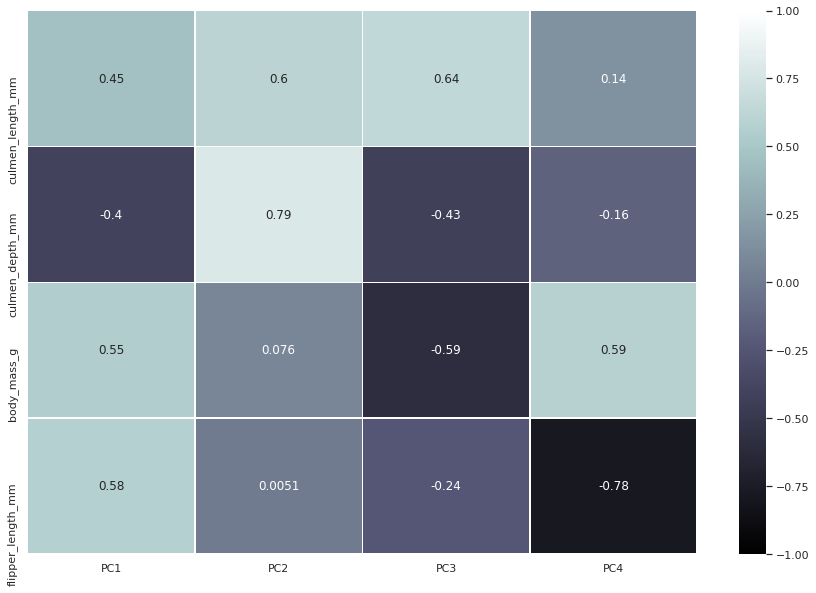

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, cmap="bone", vmin=-1, vmax=1, annot=True)

High levels in PC1 are associated with high flipper length and body mass - which are correlated variables
High levels in PC2 are associated with high culmen depth, 
High levels in PC4 are associated with high culmen length and low body mass,
High levels of PC4 are associated with low flipper lentgh 


---

## SOLVED Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

3 Preprocessing

In [ ]:
# load the dataset from GitHub - original source
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
penguins_clean = penguins.dropna(how = "any")
penguins_clean.reset_index(inplace=True, drop = True)
penguins_clean.head()

species_short     island  ...  body_mass_g     sex
0        Adelie  Torgersen  ...       3750.0    MALE
1        Adelie  Torgersen  ...       3800.0  FEMALE
2        Adelie  Torgersen  ...       3250.0  FEMALE
3        Adelie  Torgersen  ...       3450.0  FEMALE
4        Adelie  Torgersen  ...       3650.0    MALE

[5 rows x 7 columns]

In [ ]:
#encode labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

penguins_clean["sex"] = encoder.fit_transform(penguins_clean["sex"])
penguins_clean["island"] = encoder.fit_transform(penguins_clean["island"])
penguins_clean["species_short"] = encoder.fit_transform(penguins_clean["species_short"])
penguins_clean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

species_short  island  ...  body_mass_g  sex
0                0       2  ...       3750.0    2
1                0       2  ...       3800.0    1
2                0       2  ...       3250.0    1
3                0       2  ...       3450.0    1
4                0       2  ...       3650.0    2
..             ...     ...  ...          ...  ...
329              2       0  ...       4925.0    1
330              2       0  ...       4850.0    1
331              2       0  ...       5750.0    2
332              2       0  ...       5200.0    1
333              2       0  ...       5400.0    2

[334 rows x 7 columns]

In [ ]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = penguins_clean.loc[:,"island":"sex"]
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.89260388, -0.89765322,  0.78348666, -1.42952144, -0.57122888,
         0.98823488],
       [ 1.89260388, -0.82429023,  0.12189602, -1.07240838, -0.50901123,
        -0.98823488],
       [ 1.89260388, -0.67756427,  0.42724555, -0.42960487, -1.19340546,
        -0.98823488],
       ...,
       [-0.91063202,  1.17485108, -0.74326098,  1.49880565,  1.91747742,
         0.98823488],
       [-0.91063202,  0.22113229, -1.20128527,  0.78457953,  1.23308319,
        -0.98823488],
       [-0.91063202,  1.08314735, -0.53969463,  0.85600214,  1.48195382,
         0.98823488]])

In [ ]:
import numpy as np
y = np.asarray(penguins_clean["species_short"])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

4 Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

5 Classifier model


In [ ]:
# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

Logistic Regression

In [ ]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate) 
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)



[0.98148148 1.         1.         1.         0.98113208]


In [ ]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

1.0


In [ ]:
target_names_penguins = encoder.inverse_transform(list(set(y_test))) 
y_pred = model.predict(X_test) 
print(classification_report(y_test, y_pred, target_names = target_names_penguins))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
print(target_names_penguins)
!pip install -qq -U mlxtend

['Adelie' 'Chinstrap' 'Gentoo']
     |████████████████████████████████| 1.4MB 7.4MB/s 


(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa7477b6208>)

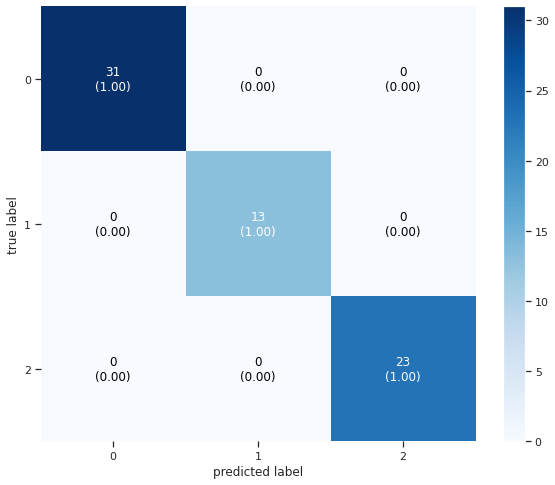

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

confmatrix = confusion_matrix(y_test,y_pred) 
plot_confusion_matrix(conf_mat=confmatrix,colorbar=True,show_absolute=True,show_normed=True,hide_spines = True) #class_names= target_names_penguins    for some reason class_names throws an error

XG boost

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[0.96296296 0.98148148 1.         0.98113208 1.        ]
1.0


In [ ]:
# Performance evaluation using the classification_report
y_pred = model.predict(X_test) # predict from the testset
print(classification_report(y_test, y_pred, target_names=target_names_penguins)) #Print out the report

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa72e785828>)

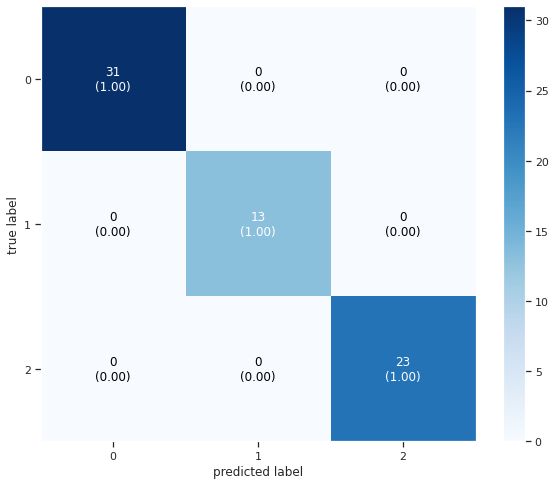

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

Both classification models are able to classify our dataset with 100% accuracy. This is probably due to the fact that the dataset is relatively small, and that the penguin species can be told apart by their features pretty easily. Maybe the accuracy would decrease if there were less features. For instance the island feature and the flipper length and mass make gentoo prediction easy. We try with less parameters now


In [ ]:
#Reduced features
penguins_reduced = penguins_clean[["species_short","culmen_length_mm","culmen_depth_mm","flipper_length_mm"]]
penguins_reduced


species_short  culmen_length_mm  culmen_depth_mm  flipper_length_mm
0                0              39.1             18.7              181.0
1                0              39.5             17.4              186.0
2                0              40.3             18.0              195.0
3                0              36.7             19.3              193.0
4                0              39.3             20.6              190.0
..             ...               ...              ...                ...
329              2              47.2             13.7              214.0
330              2              46.8             14.3              215.0
331              2              50.4             15.7              222.0
332              2              45.2             14.8              212.0
333              2              49.9             16.1              213.0

[334 rows x 4 columns]

In [ ]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = penguins_clean.loc[:,"culmen_length_mm":"flipper_length_mm"]
X_scaled = scaler.fit_transform(X)


y = np.asarray(penguins_clean["species_short"])
X_scaled, y, np.shape(X_scaled)

(array([[-0.89765322,  0.78348666, -1.42952144],
        [-0.82429023,  0.12189602, -1.07240838],
        [-0.67756427,  0.42724555, -0.42960487],
        ...,
        [ 1.17485108, -0.74326098,  1.49880565],
        [ 0.22113229, -1.20128527,  0.78457953],
        [ 1.08314735, -0.53969463,  0.85600214]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [ ]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate) 
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.96296296 0.98148148 1.         0.96226415 0.96226415]


In [ ]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

1.0


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa726b849b0>)

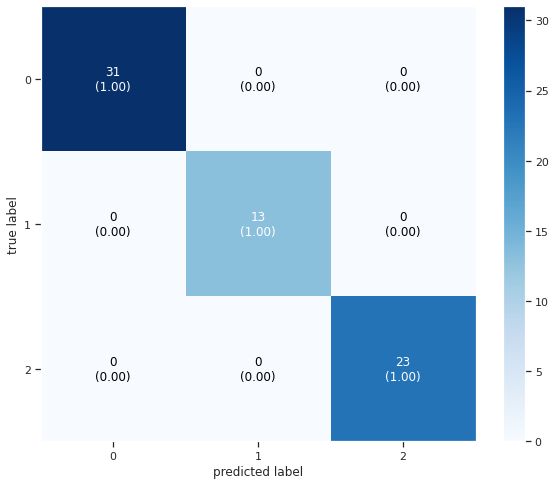

In [ ]:
# Performance evaluation using the classification_report
y_pred = model.predict(X_test) # predict from the testset
print(classification_report(y_test, y_pred, target_names=target_names_penguins)) #Print out the report

# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

Still even with reduced features, the regression models learns or overfits

---

# Portfolio assignments for Wednesday

**Requirement:** Work on solutions for *either* the network analysis case study 1 or case study 2 *and* the exercise for spatial stuff.

## SOLVED Network analysis: Case Study 1: Directed Networks: Friends & Foes at Work

### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

### Data preperation

#### Packages

In [ ]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
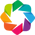

In [ ]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and creates network objects for the 3 data sets).

In [ ]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

print(nx.get_node_attributes(G_friendship, 'seniority'))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

In [ ]:
attributes

seniority  gender    office  tenure  age    practice         school
id                                                                     
1     Partner    Male    Boston      31   64  Litigation  Harvard, Yale
2     Partner    Male    Boston      32   62   Corporate  Harvard, Yale
3     Partner    Male  Hartford      13   67  Litigation  Harvard, Yale
4     Partner    Male    Boston      31   59   Corporate         Others
5     Partner    Male  Hartford      31   59  Litigation           Ucon
..        ...     ...       ...     ...  ...         ...            ...
67  Associate  Female    Boston       1   35  Litigation           Ucon
68  Associate    Male    Boston       1   26  Litigation         Others
69  Associate  Female    Boston       1   38  Litigation         Others
70  Associate    Male    Boston       1   31   Corporate           Ucon
71  Associate  Female    Boston       1   26  Litigation           Ucon

[71 rows x 7 columns]

#### Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [ ]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [ ]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [ ]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [ ]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

0.5354650209260934

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

0.019171775624653234

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.036510830626211646

#### Reciprocity

Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between `i,j` makes an edge between `j,i` more likely

In [ ]:
nx.overall_reciprocity(G_friendship)

0.6121739130434782

### The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

1  reciprocity for the work and advise network




In [ ]:
print("Advice net", nx.overall_reciprocity(G_advice))
print("Work net", nx.overall_reciprocity(G_work))

Advice net 0.3923766816143498
Work net 1.0


In [ ]:
#seems like you switch working partners on different cases, given the informal office setting. 
#But advice is sought from specific people say seniors in the firm or so, not from peers given the competitive environment

2 Communities in friendship

In [ ]:
#Clean buggy attribute data
attributes_clean = attributes.reset_index()
del attributes_clean["id"]
attributes_clean
attributesClean_dict=attributes_clean.T.to_dict()

In [ ]:
import community 

In [ ]:
#build undirected network
un_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.Graph)
nx.set_node_attributes(un_friendship, attributesClean_dict)

In [ ]:
un_friendship

print(nx.get_node_attributes(un_friendship, "seniority"))
print(nx.get_node_attributes(un_friendship, "gender"))
print(nx.get_node_attributes(un_friendship, "office"))
print(nx.get_node_attributes(un_friendship, "tenure"))
print(nx.get_node_attributes(un_friendship, "age"))
print(nx.get_node_attributes(un_friendship, "practice"))
print(nx.get_node_attributes(un_friendship, "school"))

{0: 'Partner', 1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Associate', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Assoc

In [ ]:
#run louvain method
community = community.best_partition(un_friendship)
max(community.values())

5

In [ ]:
nx.set_node_attributes(un_friendship, community, 'community')
print(nx.get_node_attributes(un_friendship, "community"))

{0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 1, 14: 0, 15: 0, 16: 0, 17: 1, 18: 2, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 1, 25: 0, 26: 0, 27: 1, 28: 3, 29: 1, 30: 1, 31: 1, 32: 1, 33: 3, 34: 1, 35: 3, 36: 0, 37: 0, 38: 3, 39: 0, 40: 2, 41: 2, 42: 3, 43: 4, 44: 3, 45: 2, 46: 5, 47: 3, 48: 2, 49: 1, 50: 1, 51: 2, 52: 0, 53: 2, 54: 2, 55: 2, 56: 2, 57: 1, 58: 1, 59: 2, 60: 2, 61: 2, 62: 1, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2}


In [ ]:
UNF_cent_degree = dict(nx.degree(un_friendship))
nx.set_node_attributes(un_friendship, UNF_cent_degree, 'cent_degree')

{0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 1, 14: 0, 15: 0, 16: 0, 17: 1, 18: 2, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 1, 25: 0, 26: 0, 27: 1, 28: 3, 29: 1, 30: 1, 31: 1, 32: 1, 33: 3, 34: 1, 35: 3, 36: 0, 37: 0, 38: 3, 39: 0, 40: 2, 41: 2, 42: 3, 43: 4, 44: 3, 45: 2, 46: 5, 47: 3, 48: 2, 49: 1, 50: 1, 51: 2, 52: 0, 53: 2, 54: 2, 55: 2, 56: 2, 57: 1, 58: 1, 59: 2, 60: 2, 61: 2, 62: 1, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2}


In [ ]:
un_friendship_layout = nx.layout.fruchterman_reingold_layout(un_friendship) 
print(un_friendship_layout)

{0: array([-0.02346792, -0.08530796]), 1: array([-0.04568164, -0.08352505]), 2: array([-0.18616444,  0.0252787 ]), 3: array([-0.07068686, -0.0188112 ]), 4: array([-0.1469736 ,  0.03877366]), 5: array([-0.22381448,  0.08041618]), 6: array([-0.19670143,  0.08887577]), 7: array([ 0.01326941, -0.05785024]), 8: array([-0.07132185, -0.04008899]), 9: array([-0.02971895, -0.05556755]), 10: array([-0.02960001, -0.03232205]), 11: array([-0.05875331, -0.04725954]), 12: array([-0.01427131, -0.01806331]), 13: array([-0.14068118,  0.02008153]), 14: array([-0.09570579, -0.13058086]), 15: array([-0.09207225, -0.03184315]), 16: array([-0.05339674, -0.01904099]), 17: array([-0.11666731,  0.09885213]), 18: array([-0.02389305, -0.06944331]), 19: array([-0.08626591, -0.00685735]), 20: array([-0.05454048, -0.00273142]), 21: array([-0.07233629, -0.06962126]), 22: array([-0.07988796,  0.0126361 ]), 23: array([-0.0178201 , -0.00024098]), 24: array([-0.09016322,  0.02019206]), 25: array([-0.03204077, -0.0121894

In [ ]:
#Viz communities
g_plot = hv.Graph.from_networkx(un_friendship, un_friendship_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [ ]:
#People of similar age range stick together
g_plot = hv.Graph.from_networkx(un_friendship, un_friendship_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='age', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [ ]:
#Seniority affects friendship strongly
g_plot = hv.Graph.from_networkx(un_friendship, un_friendship_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='seniority', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [ ]:
#Strong female community
g_plot = hv.Graph.from_networkx(un_friendship, un_friendship_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='gender', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [ ]:
#School doesn't affect too much
g_plot = hv.Graph.from_networkx(un_friendship, un_friendship_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='school', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

3 Clusters in advice

In [ ]:
un_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.Graph)
nx.set_node_attributes(un_advice, attributesClean_dict)
#run louvain method
import community
community_adv = community.best_partition(un_advice)
max(community_adv.values())

2

In [ ]:
UNA_cent_degree = dict(nx.degree(un_advice))
nx.set_node_attributes(un_advice, UNA_cent_degree, 'cent_degree')

nx.set_node_attributes(un_advice, community_adv, 'community')


In [ ]:
un_advice_layout = nx.layout.fruchterman_reingold_layout(un_advice) 


In [ ]:
#Viz communities
g_plot = hv.Graph.from_networkx(un_advice, un_advice_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [ ]:
#Partners are the center of the advice
g_plot = hv.Graph.from_networkx(un_advice, un_advice_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='seniority', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [ ]:
#most sought advice is on litigation. Maybe because it is more difficult ?
g_plot = hv.Graph.from_networkx(un_advice, un_advice_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='practice', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [ ]:
#Most advice givers are males
g_plot = hv.Graph.from_networkx(un_advice, un_advice_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='gender', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

##SOLVED Exercise for spatial stuff

So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

In [ ]:
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

--2020-12-11 10:11:13--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip [following]
--2020-12-11 10:11:13--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951658 (929K) [application/zip]
Saving to: ‘shapefiles_exercise.zip’

shapefiles_exercise 100%[===================>] 929.35K  --.-KB/s    in 0.07s   

2020

In [ ]:
# Loading required packages
!pip install contextily
!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

In [ ]:
# Load the noise data

stoejdata = gpd.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")
stoejdata.head()

DATAEJER  VEJBESTYRE  ...  GNSHAST222                        geometry
0      316       316.0  ...        50.7  POINT (666785.000 6174847.000)
1      316       316.0  ...        61.0  POINT (650362.000 6165481.000)
2      316       316.0  ...        39.6  POINT (670888.000 6165624.000)
3      316       316.0  ...        74.1  POINT (675622.000 6167385.000)
4      316       316.0  ...        58.7  POINT (668085.000 6163679.000)

[5 rows x 36 columns]

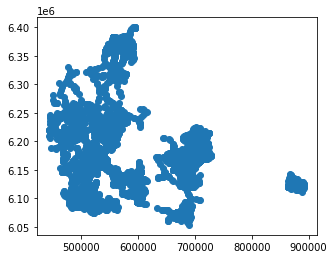

In [ ]:
stoejdata.plot()

In [ ]:
#load the municipality map
!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip" # Downloads data files
!unzip shapefiles.zip # Unpacks data files
municipalities = gpd.read_file("KOMMUNE.shp")
municipalities.head()

--2020-12-01 14:41:45--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip [following]
--2020-12-01 14:41:45--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32728265 (31M) [application/zip]
Saving to: ‘shapefiles.zip.1’

shapefiles.zip.1    100%[===================>]  31.21M  65.6MB/s    in 0.5s    

2020-12-01 14:41:46 (65.6 MB/s) - ‘sh

FEAT_ID  ...                                           geometry
0   149673  ...  POLYGON Z ((675926.480 6172129.210 -999.000, 6...
1   149674  ...  POLYGON Z ((687523.890 6176458.950 -999.000, 6...
2   149675  ...  POLYGON Z ((689361.510 6173523.720 -999.000, 6...
3   149676  ...  POLYGON Z ((689210.210 6174589.210 -999.000, 6...
4   149647  ...  POLYGON Z ((679613.660 6187623.990 -999.000, 6...

[5 rows x 25 columns]

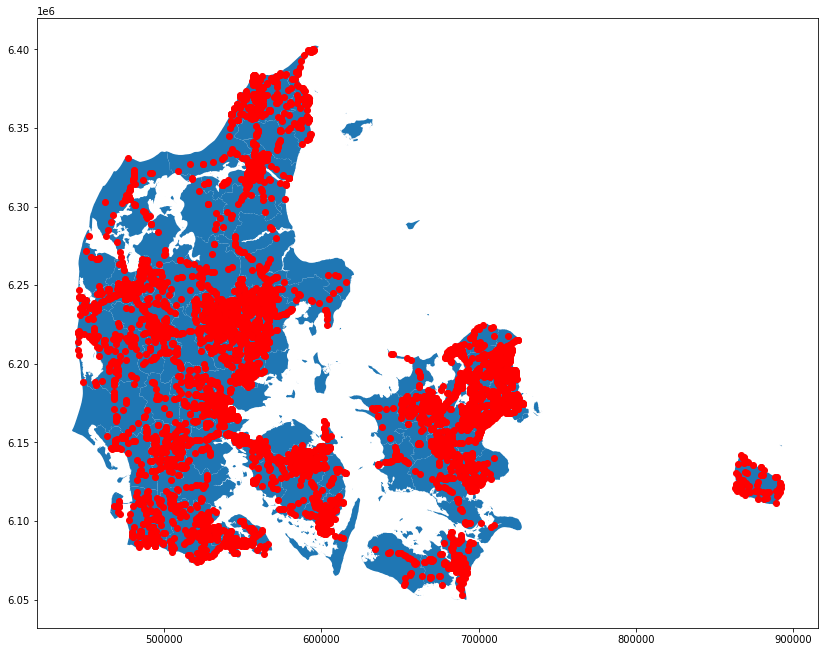

In [ ]:
#see if they are on the same coord system
fig, ax =plt.subplots(1,1, figsize=(14,14))
municipalities.plot(ax=ax)
stoejdata.plot(ax=ax, color="red")

In [ ]:
#no need to change coord system
#merge the two datasets
noise_in_mun = gpd.sjoin(stoejdata,municipalities, how = "right", op = "within")
noise_in_mun.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:25832
Right CRS: PROJCS["UTM32_EUREF89",GEOGCS["GCS_EUREF89",DATUM[ ...

  This is separate from the ipykernel package so we can avoid doing imports until


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9217 entries, 0 to 1574
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index_left  7745 non-null   float64 
 1   DATAEJER    7745 non-null   object  
 2   VEJBESTYRE  7745 non-null   float64 
 3   VEJNR       7745 non-null   float64 
 4   VEJDEL      7745 non-null   object  
 5   VEJNAVN     7743 non-null   object  
 6   KILOMETER   7745 non-null   float64 
 7   METER       7745 non-null   float64 
 8   LOKATION    7742 non-null   object  
 9   KOMMUNE     7745 non-null   float64 
 10  AAR         7745 non-null   float64 
 11  AADT        7745 non-null   float64 
 12  TIMEANTAL0  7721 non-null   float64 
 13  TIMEANTAL1  7721 non-null   float64 
 14  TIMEANTAL2  7721 non-null   float64 
 15  GNSHAST07_  7694 non-null   float64 
 16  GNSHAST19_  7693 non-null   float64 
 17  GNSHAST22_  7693 non-null   float64 
 18  TIMEANTAL3  7667 non-null   float64 
 19

Text(0.5, 1.0, 'Noise level per municipality')

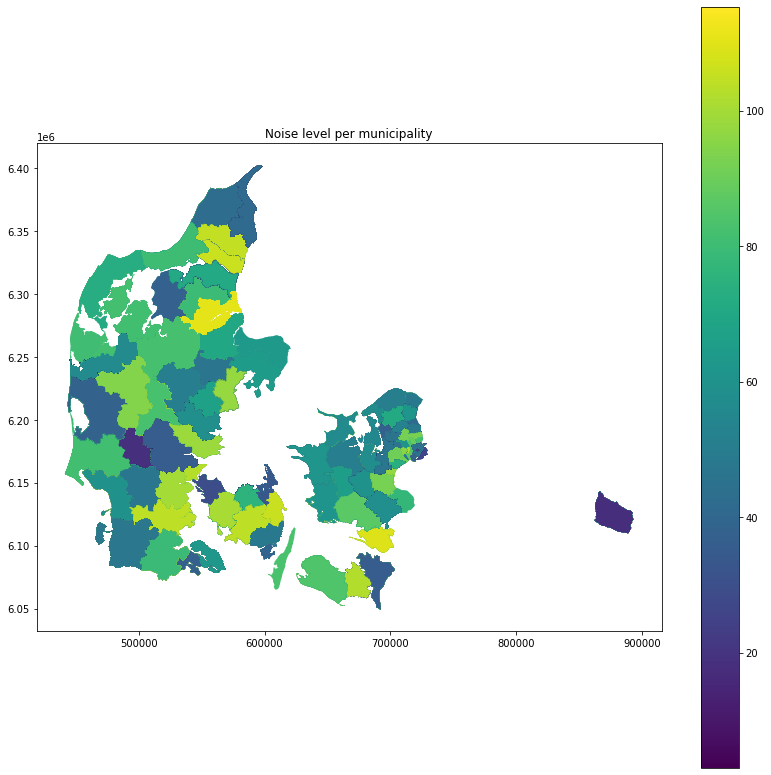

In [ ]:
noise_in_mun.plot(column="GNSHAST071", legend="True", figsize=(14,14))
plt.title("Noise level per municipality")


In [ ]:
print(noise_in_mun.groupby("KOMNAVN")["GNSHAST071"].mean())

KOMNAVN
Aabenraa            80.434694
Aalborg             51.732911
Aarhus              85.739216
Albertslund         49.060215
Allerød             44.873134
                      ...    
Vejle               47.710448
Vesthimmerlands     54.666667
Viborg              77.962500
Vordingborg        104.410000
Ærø                       NaN
Name: GNSHAST071, Length: 99, dtype: float64


In [ ]:
#load again psy data
mun_data=pd.read_excel("https://github.com/CALDISS-AAU/sdsphd20/raw/master/datasets/spatialdata.xlsx")
mun_data.head()

omr  alt2016  psyk2016  psykratio
0      København    64735      1326   0.020484
1  Frederiksberg    12364       258   0.020867
2         Dragør     1746        54   0.030928
3         Tårnby     5614       158   0.028144
4    Albertslund     3686        76   0.020619

In [ ]:
#merge datasets because excel file has no geospatiality
mun_fun = noise_in_mun.merge(mun_data, left_on='KOMNAVN', right_on="omr", how='left')
mun_fun.head()


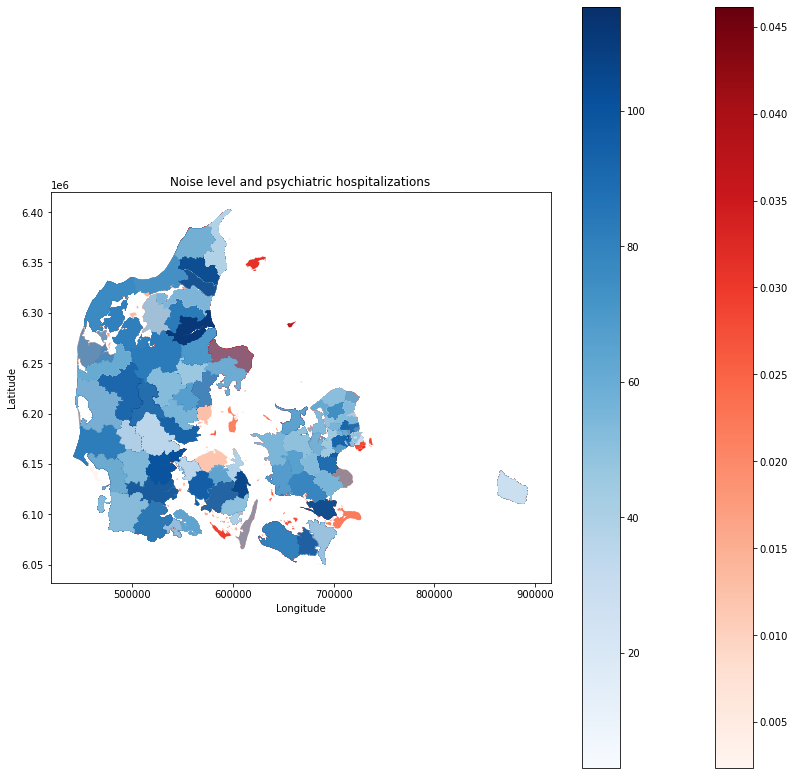

In [ ]:
fig, ax =plt.subplots(1,1, figsize=(14,14))
plt.title('Noise level and psychiatric hospitalizations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
mun_fun.plot(column="psykratio", ax = ax, legend=True, figsize=(14,14), cmap='Reds')
mun_fun.plot(column="GNSHAST071", ax = ax, legend =True, figsize=(14,14), cmap='Blues', alpha = 0.5)

# Portfolio assignments for Thursday

**Requirement:** Work on solutions for the "Trump vs. GPT-2" assignment

## SOLVED NLP: Trump vs. GPT-2

The site [https://faketrump.ai/](https://faketrump.ai/) WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

> I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

> The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

> He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz) and has the following format:


<table>
  <tr>
   <td>0
   </td>
   <td>1
   </td>
  </tr>
  <tr>
   <td>string
   </td>
   <td>boolean
   </td>
  </tr>
</table>

There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:



```
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
```



* Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

* Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

* Consider exploring using a different approach (LSI + clustering) or perhaps even [CorEx](https://github.com/gregversteeg/corex_topic)

Classifier 

In [ ]:
#load data
import pandas as pd

data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
data.columns=["tweet", "real"]
data

tweet   real
0      I was thrilled to be back in the Great city of...   True
1      The Unsolicited Mail In Ballot Scam is a major...   True
2      As long as I am President, I will always stand...   True
3      Our Economy is doing great, and is ready to se...   True
4      If I do not sound like a typical Washington po...   True
...                                                  ...    ...
14731  But there is not one!....I am a very strong be...  False
14732  We are only wasting money because of the Fake ...  False
14733  The Washington Post, after having been so dish...  False
14734  No one else did so well in many decades of bei...  False
14735  #KAG2020 are sending a delegation to Washingto...  False

[14736 rows x 2 columns]

In [ ]:
#Split Data
from sklearn.model_selection import train_test_split
X = data["tweet"]
y = data["real"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [ ]:
#BoW
from sklearn.feature_extraction.text import CountVectorizer

Bow_vectorizer = CountVectorizer()
X_train_bow = Bow_vectorizer.fit_transform(X_train)

In [ ]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
#Logistic Classifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)


In [ ]:
#fit to BoW
model.fit(X_train_bow, y_train)
X_test_bow = Bow_vectorizer.transform(X_test)
print("model score", model.score(X_test_bow, y_test))
y_pred = model.predict(X_test_bow)
pd.crosstab(y_test, y_pred)

model score 0.8059701492537313


col_0  False  True 
real               
False   1180    309
True     263   1196

In [ ]:
#fit to tfidf
model.fit(X_train_tfidf, y_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("model score", model.score(X_test_tfidf, y_test))
y_pred_tfidf = model.predict(X_test_tfidf)
pd.crosstab(y_test, y_pred_tfidf)

model score 0.8171641791044776


col_0  False  True 
real               
False   1189    300
True     239   1220

In [ ]:
#The tfidf vectorizing gives better accuracy to the regression classifier. 
#we have less false positives.

EDA using LDA

In [ ]:
from gensim.models import LdaMulticore
import spacy
nlp = spacy.load("en")

In [ ]:
#load Data and tokenize
data1000 = data.iloc[:1000]

tokens = []

for summary in nlp.pipe(data1000['tweet']):
  tweet_tok = [token.lemma_.lower() for token in summary if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens.append(tweet_tok)

data1000["tokens"] = tokens

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(data1000['tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in data1000['tokens']]

In [ ]:
from gensim.models import LdaMulticore
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=10, workers = 4, passes=10)
lda_model.print_topics(-1)

[(0,
  '0.057*"impeachment" + 0.038*"amp" + 0.038*"hoax" + 0.030*"good" + 0.028*"great" + 0.025*"russia" + 0.024*"democrat" + 0.024*"year" + 0.019*"schumer" + 0.019*"party"'),
 (1,
  '0.050*"america" + 0.039*"biden" + 0.034*"trump" + 0.031*"joe" + 0.031*"vote" + 0.030*"year" + 0.029*"election" + 0.028*"court" + 0.022*"american" + 0.020*"country"'),
 (2,
  '0.061*"trump" + 0.055*"president" + 0.053*"country" + 0.034*"new" + 0.033*"strong" + 0.024*"%" + 0.021*"great" + 0.018*"year" + 0.016*"people" + 0.014*"congressman"'),
 (3,
  '0.050*"democrats" + 0.045*"radical" + 0.038*"left" + 0.030*"m" + 0.022*"high" + 0.022*"amp" + 0.021*"people" + 0.019*"school" + 0.019*"country" + 0.018*"schiff"'),
 (4,
  '0.055*"great" + 0.055*"news" + 0.048*"fake" + 0.047*"people" + 0.022*"american" + 0.016*"china" + 0.016*"state" + 0.016*"far" + 0.016*"time" + 0.014*"democrat"'),
 (5,
  '0.055*"house" + 0.042*"coronavirus" + 0.034*"obama" + 0.032*"president" + 0.030*"white" + 0.025*"administration" + 0.021*"

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim
%matplotlib inline
pyLDAvis.enable_notebook()

lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

LSI and Clustering

In [ ]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

In [ ]:
from gensim.models.lsimodel import LsiModel
lsi = LsiModel(tfidf_corpus, id2word=dictionary, num_topics=100)
print(lsi)

LsiModel(num_terms=421, num_topics=100, decay=1.0, chunksize=20000)


In [ ]:
lsi_corpus = lsi[tfidf_corpus]

In [ ]:
from gensim.similarities import MatrixSimilarity
document_topic_matrix = MatrixSimilarity(lsi_corpus)
document_topic_matrix_ix = document_topic_matrix.index


In [ ]:
import umap
embeddings = umap.UMAP(n_neighbors=15, metric='cosine').fit_transform(document_topic_matrix_ix)

from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters = 10)
clusterer.fit(document_topic_matrix_ix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


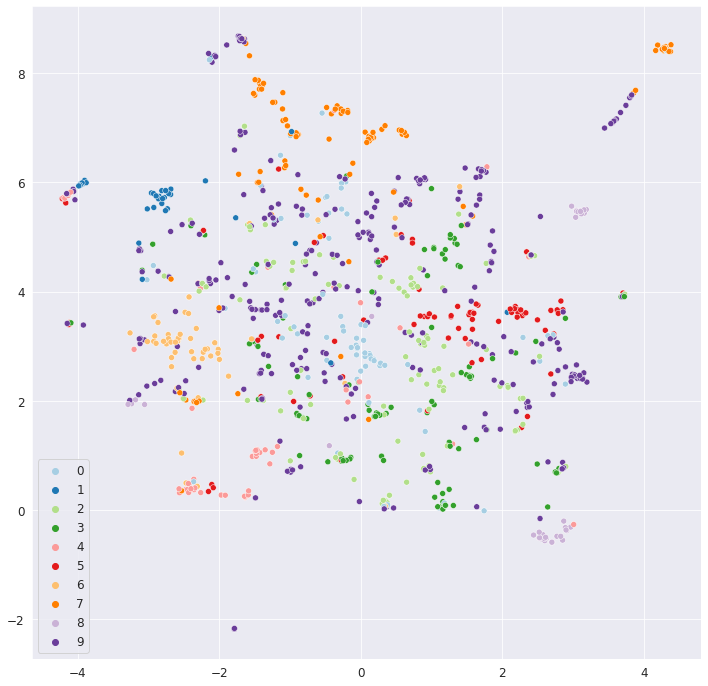

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting things
sns.set_style("darkgrid")

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,12))
g = sns.scatterplot(*embeddings.T,
                    #reduced[:,0],reduced[:,1],
                   hue=clusterer.labels_,
                    palette="Paired",
                   legend='full')

In [ ]:
data1000['cluster'] = clusterer.labels_

In [ ]:
data1000[data1000['cluster'] == 2]['tweet']

0      I was thrilled to be back in the Great city of...
3      Our Economy is doing great, and is ready to se...
19     Dr.Tony Fauci says we don’t allow him to do te...
30     The GREAT Bobby Bowden, one of the best coache...
39     Much more “disinformation” coming out of CNN, ...
                             ...                        
953    Great work by the Governors of AZ, IA, LA, and...
962    Our Coronavirus testing is so much greater (25...
981    Thank you to our GREAT Republican Congressmen ...
984    The men and women of the National Guard have b...
986    Thank you to our great American businesses for...
Name: tweet, Length: 119, dtype: object

In [ ]:
#seems like this cluster revolves around the word great

In [ ]:
#analayize topics per cluster
from gensim.matutils import corpus2dense
import numpy as np

tfidf_matrix = corpus2dense(tfidf_corpus, len(dictionary)).T


for i in set(clusterer.labels_):
  cluster_index = data1000[data1000['cluster'] == i].index
  topk = np.flip(np.argsort(np.sum(tfidf_matrix[cluster_index,:], axis=0)))[:10]

  print(str(i) + str([dictionary[x] for x in topk]))

0['president', 'trump', 'donald', 'policy', 'voter', 'day', 'supporter', 'black', 'poll', 'book']
1['states', 'united', 'supreme', 'court', 'world', 'president', 'attack', 'iran', 'law', 'life']
2['great', 'country', 'american', 'state', 'incredible', 'people', 'job', 'book', 'texas', 'fantastic']
3['year', 'america', 'nation', 'john', 'today', 'americans', 'ago', 'life', 'airport', 'economy']
4['radical', 'left', 'new', 'york', 'democrats', 'seattle', 'city', 'post', 'governor', 'anarchist']
5['biden', 'joe', 'sleepy', 'vote', 'american', 'fracking', 'corrupt', 'ban', 'left', 'industry']
6['news', 'fake', 'medium', 'campaign', 'number', 'media', 'big', 'story', 'great', 'amp']
7['impeachment', 'house', 'hoax', 'pelosi', 'mike', 'mini', 'nancy', 'bloomberg', 'democrat', 'trial']
8['federal', 'm', 'government', 'fund', 'reserve', 'infrastructure', 'proud', 'bus', 'competitor', 'funding']
9['people', 'amp', 'election', 'ballot', 'big', 'strong', 'state', 'time', 'congress', 'mail']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)
